***EMPLOYEE ATTRITION ML _ ANN***

### ***Introduction***

*Employee attrition refers to the situation when employees voluntarily or involuntarily leave an organization. High attrition rates create serious* *challenges for companies, such as increased recruitment costs, loss of skilled talent, reduced productivity, and disruption of team performance.*

*In today’s competitive business environment, organizations aim to retain talented employees by understanding the factors that influence attrition. Machine Learning, especially Artificial Neural Networks (ANN), provides a powerful way to analyze complex employee data and predict whether an employee is likely to leave the company.*

*This project focuses on building an ANN-based classification model to predict employee attrition using historical HR data.*

In [46]:
# importing python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# getting dataset in the jypter
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# dataset columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

---------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
# let understand column one - by - one
data["Age"].head(5).reset_index()

,index,Age
0,0,41
1,1,49
2,2,37
3,3,33
4,4,27


**1.Age**

> *Employee’s age in years*

> *Important for predicting attrition*

---------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
data["Attrition"].head(5).reset_index()

,index,Attrition
0,0,Yes
1,1,No
2,2,Yes
3,3,No
4,4,No


**2. Attrition**

*What it means: Whether the employee left the company*

**Values:**

> *Yes → Employee left*

> *No → Employee stayed*

---------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
data["BusinessTravel"].head(5).reset_index()

,index,BusinessTravel
0,0,Travel_Rarely
1,1,Travel_Frequently
2,2,Travel_Rarely
3,3,Travel_Frequently
4,4,Travel_Rarely


**3. BusinessTravel**

> *How often employee travels*

**Example:**

>*Rarely.*

>*Frequently*

>*Non-Travel*

---------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
data["DailyRate"].head(5).reset_index()

,index,DailyRate
0,0,1102
1,1,279
2,2,1373
3,3,1392
4,4,591


**4.DailyRate**

> *Daily salary rate*

---------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
data["Department"].head(5).reset_index()

,index,Department
0,0,Sales
1,1,Research & Development
2,2,Research & Development
3,3,Research & Development
4,4,Research & Development


**5. Department**

> *Employee’s department*

Example: 
> *Sales* 

> *R&D* 


> *HR*

---------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
data["DistanceFromHome"].head(5).reset_index()

,index,DistanceFromHome
0,0,1
1,1,8
2,2,2
3,3,3
4,4,2


**6.DistanceFromHome**

> *Distance between home and office (km)*

> *Higher distance → higher chance of attrition*

---------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
data["Education"].head(5).reset_index()

,index,Education
0,0,2
1,1,1
2,2,2
3,3,4
4,4,1


**7.Education**

*Education level:*

> *1 = Below College*

> *2 = College*

> *3 = Bachelor*

> *4 = Master*

> *5 = Doctor*

****Numeric but categorical****

---------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
data["EducationField"].head(5).reset_index()

,index,EducationField
0,0,Life Sciences
1,1,Life Sciences
2,2,Other
3,3,Life Sciences
4,4,Medical


**8.EducationField**

> *Field of education (Life Sciences, Medical, Marketing, etc.)*

> *Categorical feature*

---------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
data["EmployeeCount"].head(5).reset_index()

,index,EmployeeCount
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


**9.EmployeeCount**

> *Always = 1*

*We can ❌ Drop.*

---------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
data["EmployeeNumber"].head(5).reset_index()

,index,EmployeeNumber
0,0,1
1,1,2
2,2,4
3,3,5
4,4,7


**10.EmployeeNumber**

> *Unique employee ID*

*We Can ❌ Drop (no predictive value)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
data["EnvironmentSatisfaction"].head(5).reset_index()

,index,EnvironmentSatisfaction
0,0,2
1,1,3
2,2,4
3,3,4
4,4,1


**11.EnvironmentSatisfaction**

> *Work environment satisfaction*

> *Scale: 1 (Low) → 4 (Very High)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
data["Gender"].head(5).reset_index()

,index,Gender
0,0,Female
1,1,Male
2,2,Male
3,3,Female
4,4,Male


**12.Gender**

> *Male / Female*

> *Categorical feature*

---------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
data["HourlyRate"].head(5).reset_index()

,index,HourlyRate
0,0,94
1,1,61
2,2,92
3,3,56
4,4,40


**13.HourlyRate**

> *Hourly wage*

---------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
data["JobInvolvement"].head(5).reset_index()

,index,JobInvolvement
0,0,3
1,1,2
2,2,2
3,3,3
4,4,3


**14. JobInvolvement**

*How involved the employee is:*

> *1 = Low*

> *2 = Medium*

> *3 = High*

> *4 = Very High*

---------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
data["JobLevel"].head(5).reset_index()

,index,JobLevel
0,0,2
1,1,2
2,2,1
3,3,1
4,4,1


**15.JobLevel**

> *Job seniority level (1–5)*

> *Higher → more senior*

---------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
data["JobRole"].head(5).reset_index()

,index,JobRole
0,0,Sales Executive
1,1,Research Scientist
2,2,Laboratory Technician
3,3,Research Scientist
4,4,Laboratory Technician


**16. JobRole**

> *Actual job role*

**Example** :  

> *Manager*

> *Developer*

> *Sales Executive*

---------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
data["JobSatisfaction"].head(5).reset_index()

,index,JobSatisfaction
0,0,4
1,1,2
2,2,3
3,3,3
4,4,2


**17. JobSatisfaction**

> *Job happiness level*

> *Scale: 1–4*

---------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
data["MaritalStatus"].head(5).reset_index()

,index,MaritalStatus
0,0,Single
1,1,Married
2,2,Single
3,3,Married
4,4,Married


**18. MaritalStatus**

 > Single / Married / Divorced

> Often affects attrition

---------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
data["MonthlyIncome"].head(5).reset_index()

,index,MonthlyIncome
0,0,5993
1,1,5130
2,2,2090
3,3,2909
4,4,3468


**19. MonthlyIncome**

> *Employee’s monthly salary*

> *Very important feature*

---------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
data["MonthlyRate"].head(5).reset_index()

,index,MonthlyRate
0,0,19479
1,1,24907
2,2,2396
3,3,23159
4,4,16632


**20. MonthlyRate**

> *Monthly compensation rate*

> *Less impactful than MonthlyIncome*

---------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
data["NumCompaniesWorked"].head(5).reset_index()

,index,NumCompaniesWorked
0,0,8
1,1,1
2,2,6
3,3,1
4,4,9


**21. NumCompaniesWorked**

> *Number of companies employee worked in*

---------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
data["Over18"].head(5).reset_index()

,index,Over18
0,0,Y
1,1,Y
2,2,Y
3,3,Y
4,4,Y


**22. Over18**

> *Whether employee is over 18*

> *Always “Yes” → ❌ Not useful (can be dropped)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [26]:
data["OverTime"].head(5).reset_index()

,index,OverTime
0,0,Yes
1,1,No
2,2,Yes
3,3,Yes
4,4,No


**23. OverTime**

> *Does employee work overtime?*

> *Yes / No*

> *⚠️ Very strong attrition predictor*

---------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
data["PercentSalaryHike"].head(5).reset_index()

,index,PercentSalaryHike
0,0,11
1,1,23
2,2,15
3,3,11
4,4,12


**24. PercentSalaryHike**

> *Percentage increase in salary during last appraisal*

---------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
data["PerformanceRating"].head(5).reset_index()

,index,PerformanceRating
0,0,3
1,1,4
2,2,3
3,3,3
4,4,3


**25. PerformanceRating**

> *Performance score of employee*

> *Scale: 1 (Low) → 4 (Outstanding)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [29]:
data["RelationshipSatisfaction"].head(5).reset_index()

,index,RelationshipSatisfaction
0,0,1
1,1,4
2,2,2
3,3,3
4,4,4


**26. RelationshipSatisfaction**

> *Satisfaction with workplace relationships*

> *Scale: 1 (Low) → 4 (Very High)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
data["StandardHours"].head(5).reset_index()

,index,StandardHours
0,0,80
1,1,80
2,2,80
3,3,80
4,4,80


**27. StandardHours**

> *Standard working hours (usually constant = 80)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
data["StockOptionLevel"].head(5).reset_index()

,index,StockOptionLevel
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1


**28. StockOptionLevel**

> *Level of stock options given to employee (0–3)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
data["TotalWorkingYears"].head(5).reset_index()

,index,TotalWorkingYears
0,0,8
1,1,10
2,2,7
3,3,8
4,4,6


**29. TotalWorkingYears**

> *Total years of work experience*

---------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
data["TrainingTimesLastYear"].head(5).reset_index()

,index,TrainingTimesLastYear
0,0,0
1,1,3
2,2,3
3,3,3
4,4,3


**30. TrainingTimesLastYear**

> *Number of training sessions attended last year*

---------------------------------------------------------------------------------------------------------------------------------------------

In [34]:
data["WorkLifeBalance"].head(5).reset_index()

,index,WorkLifeBalance
0,0,1
1,1,3
2,2,3
3,3,3
4,4,3


**31. WorkLifeBalance**

> *Employee’s work-life balance rating*

> *Scale: 1 (Bad) → 4 (Excellent)*

---------------------------------------------------------------------------------------------------------------------------------------------

In [35]:
data["YearsAtCompany"].head(5).reset_index()

,index,YearsAtCompany
0,0,6
1,1,10
2,2,0
3,3,8
4,4,2


**32. YearsAtCompany**

> *Years the employee has worked in the current company*

---------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
data["YearsInCurrentRole"].head(5).reset_index()

,index,YearsInCurrentRole
0,0,4
1,1,7
2,2,0
3,3,7
4,4,2


**33. YearsInCurrentRole**

> *Years in the current job role*

---------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
data["YearsSinceLastPromotion"].head(5).reset_index()

,index,YearsSinceLastPromotion
0,0,0
1,1,1
2,2,0
3,3,3
4,4,2


**34. YearsSinceLastPromotion**

> *Years passed since last promotion*

---------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
data["YearsWithCurrManager"].head(5).reset_index()

,index,YearsWithCurrManager
0,0,5
1,1,7
2,2,0
3,3,0
4,4,2


**35. YearsWithCurrManager**

> *Years working under the current manager*

---------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
# rows and columns of the dataset
data.shape

(1470, 35)

---------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# dataset infromation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

---------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
# statical of the dataset 
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


---------------------------------------------------------------------------------------------------------------------------------------------

Data Visualization

---------------------------------------------------------------------------------------------------------------------------------------------

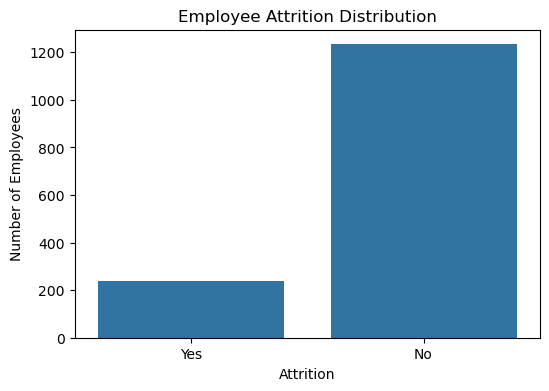

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=data)
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.show()

**Attrition Distribution**

*Explanation:*
> This graph shows the distribution of employees who left versus stayed, highlighting class imbalance in the dataset.

---------------------------------------------------------------------------------------------------------------------------------------------

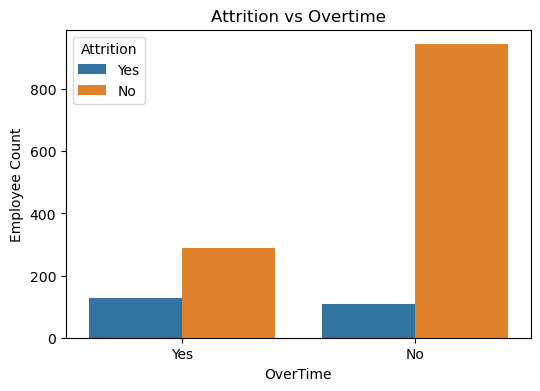

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=data)
plt.title("Attrition vs Overtime")
plt.xlabel("OverTime")
plt.ylabel("Employee Count")
plt.show()

**Attrition vs Overtime**

*Explanation:*
> Employees working overtime have a significantly higher attrition rate, making overtime a key predictor of employee turnover.

---------------------------------------------------------------------------------------------------------------------------------------------

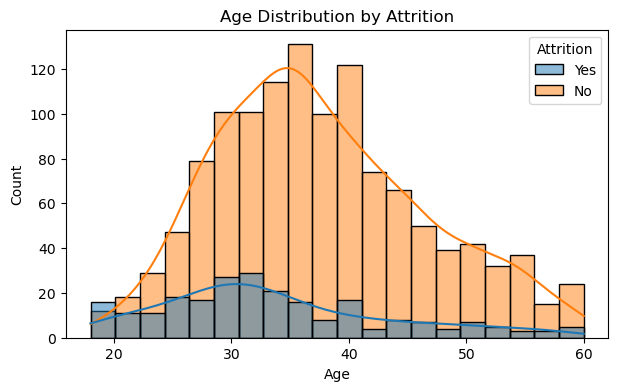

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(data=data, x="Age", hue="Attrition", bins=20, kde=True)
plt.title("Age Distribution by Attrition")
plt.show()

**Age Distribution by Attrition**

*Explanation:*
> Younger employees show higher attrition, indicating early-career job switching behavior

---------------------------------------------------------------------------------------------------------------------------------------------

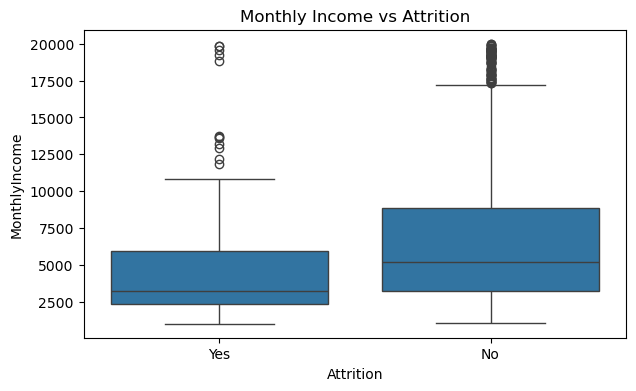

In [15]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=data)
plt.title("Monthly Income vs Attrition")
plt.show()

**Monthly Income vs Attrition**

*Explanation:*
> Employees with lower monthly income tend to leave more frequently compared to higher-paid employees.

---------------------------------------------------------------------------------------------------------------------------------------------

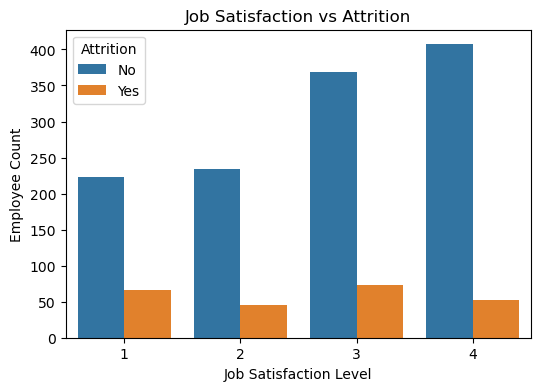

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=data)
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Employee Count")
plt.show()

**Job Satisfaction vs Attrition**

*Explanation:*
> Lower job satisfaction levels are strongly associated with higher employee attrition.

---------------------------------------------------------------------------------------------------------------------------------------------

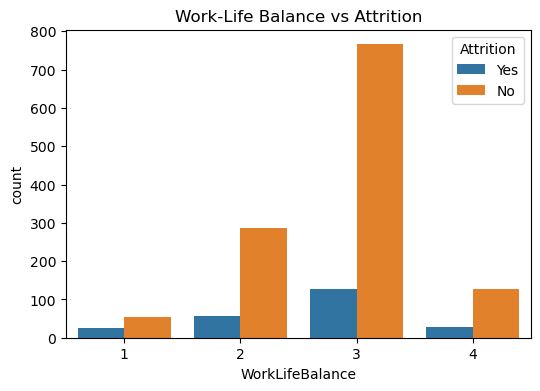

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=data)
plt.title("Work-Life Balance vs Attrition")
plt.show()

**Work-Life Balance vs Attrition**

*Explanation:*
> Poor work-life balance significantly increases the likelihood of employee attrition

---------------------------------------------------------------------------------------------------------------------------------------------

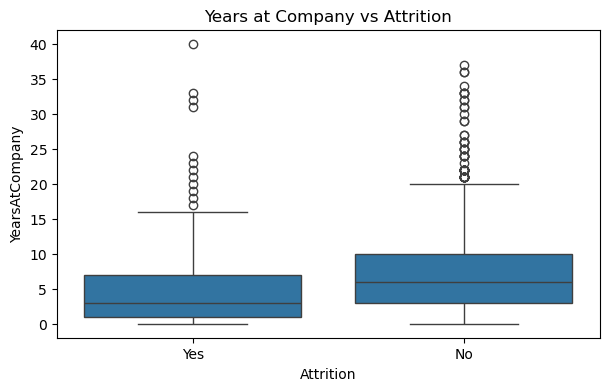

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Attrition", y="YearsAtCompany", data=data)
plt.title("Years at Company vs Attrition")
plt.show()

**Years at Company vs Attrition**

*Explanation:*
> Employees with fewer years at the company are more likely to leave than long-tenured employees.

---------------------------------------------------------------------------------------------------------------------------------------------

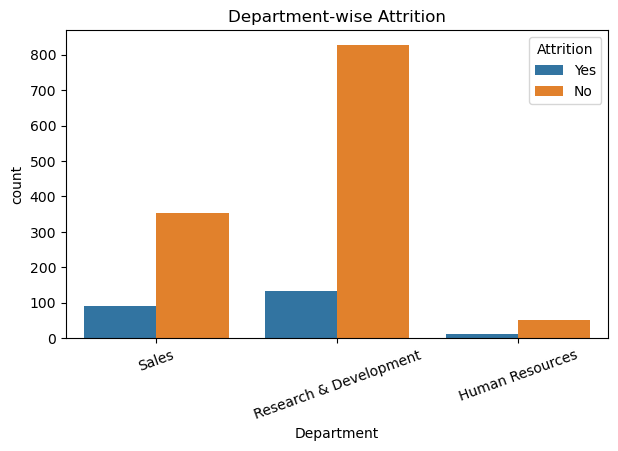

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x="Department", hue="Attrition", data=data)
plt.title("Department-wise Attrition")
plt.xticks(rotation=20)
plt.show()

**Department-wise Attrition**

*Explanation:*
> Attrition rates vary across departments, with Sales showing higher employee turnover.

---------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
# Preprocessing machine learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

---------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
# coverting yes - no <tooo> 1 and 0.
data["Attrition"] = data["Attrition"].map({"Yes": 1, "No": 0})

---------------------------------------------------------------------------------------------------------------------------------------------

In [50]:
# droping un-usable columns
data.drop(["EmployeeNumber", "EmployeeCount", "StandardHours", "Over18"], axis=1, inplace=True)

---------------------------------------------------------------------------------------------------------------------------------------------

In [51]:
# x and y data
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

---------------------------------------------------------------------------------------------------------------------------------------------

*“These lines automatically separate numerical and categorical features from the dataset based on their data types, which helps apply appropriate preprocessing techniques.”*

In [52]:
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

---------------------------------------------------------------------------------------------------------------------------------------------

*“It preprocesses numerical features with scaling and categorical features with one-hot encoding using a ColumnTransformer.”*

In [53]:
num_pipeline = Pipeline([("scaler", StandardScaler())])

cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", num_pipeline, numerical_features),("cat", cat_pipeline, categorical_features)])

---------------------------------------------------------------------------------------------------------------------------------------------

In [54]:
# testing and checking by the model for the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
# We fit the preprocessor on training data to learn rules and apply the same rules to both training and test data to avoid data leakage.
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

---------------------------------------------------------------------------------------------------------------------------------------------

In [56]:
# Evaluation library of machine learning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Deep Learning library of machine learninig 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

---------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
# making the model
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))

C:\Users\fv5\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
# This line sets how the model learns , and how performance is measured. 
model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

---------------------------------------------------------------------------------------------------------------------------------------------

In [59]:
# running the model
history = model.fit(X_train, y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7500 - loss: 0.5476 - val_accuracy: 0.8305 - val_loss: 0.4626
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8372 - loss: 0.4361 - val_accuracy: 0.8305 - val_loss: 0.4147
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8404 - loss: 0.4123 - val_accuracy: 0.8305 - val_loss: 0.3795
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8447 - loss: 0.3923 - val_accuracy: 0.8390 - val_loss: 0.3592
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8553 - loss: 0.3604 - val_accuracy: 0.8390 - val_loss: 0.3416
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8500 - loss: 0.3663 - val_accuracy: 0.8644 - val_loss: 0.3252
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8660 - loss: 0.3424 - val_accuracy: 0.8729 - val_loss: 0.3200
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8628 - loss: 0.3477 - val_accuracy: 0.8729 - val_loss

---------------------------------------------------------------------------------------------------------------------------------------------

In [60]:
# checking the accurary score
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy_score(y_test, y_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


0.8503401360544217

---------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
# printing report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.55      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.67       294
weighted avg       0.83      0.85      0.84       294



---------------------------------------------------------------------------------------------------------------------------------------------

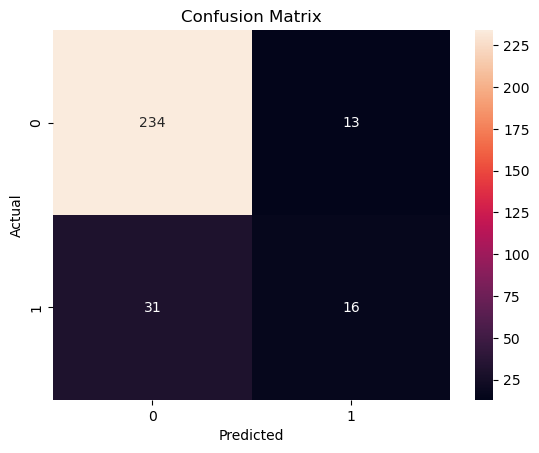

In [62]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


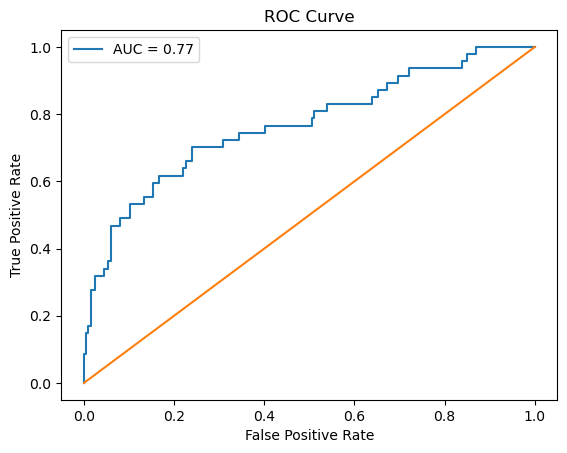

In [63]:
# ROC CURVE
y_prob = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

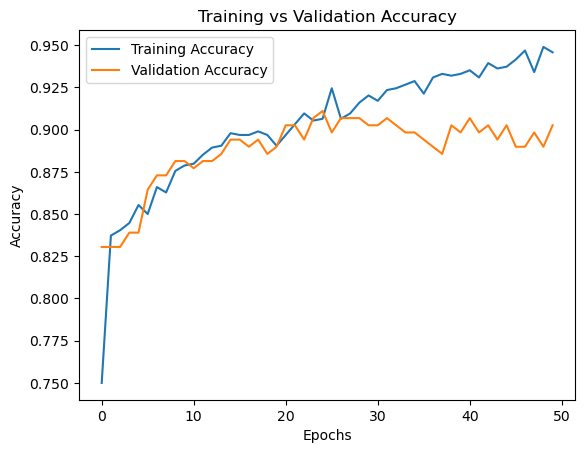

In [64]:
# ROC CURVE BETWEEN  TRAINING <> VALIDATION ACCURACY
plt.figure()
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

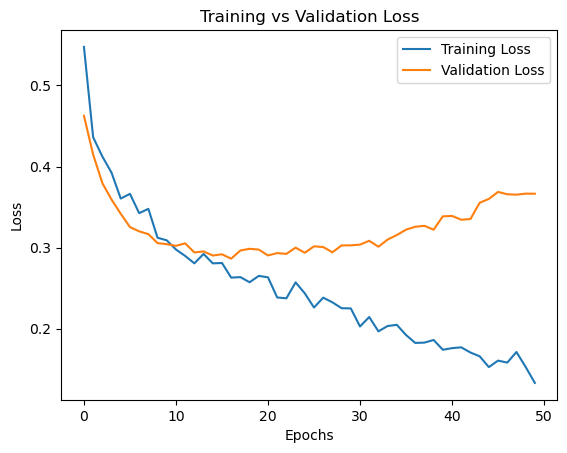

In [65]:
# ROC CURVE BETWEEN  TRAINING <> VALIDATION LOSS
plt.figure()
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


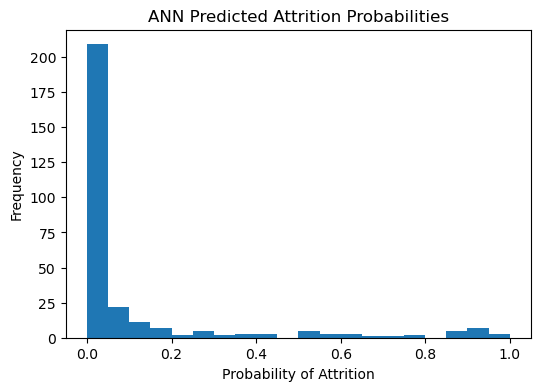

In [66]:
# ANN PREDICT HIST PLOT
y_prob = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20)
plt.title("ANN Predicted Attrition Probabilities")
plt.xlabel("Probability of Attrition")
plt.ylabel("Frequency")
plt.show()

**ANN Predicted Probability Distribution**

*Explanation:*
> The distribution shows how confidently the ANN predicts employee attrition probabilities.

---------------------------------------------------------------------------------------------------------------------------------------------

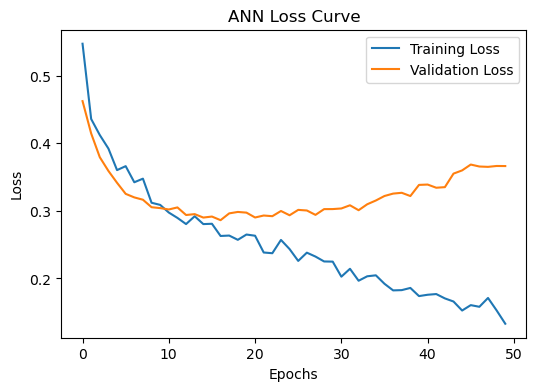

In [67]:
# ANN LOSS IN ROC CURVE
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("ANN Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**ROC Curve (ANN Model)**

*Explanation:*
> The ROC curve demonstrates the ANN’s ability to distinguish between employees who leave and stay.

---------------------------------------------------------------------------------------------------------------------------------------------

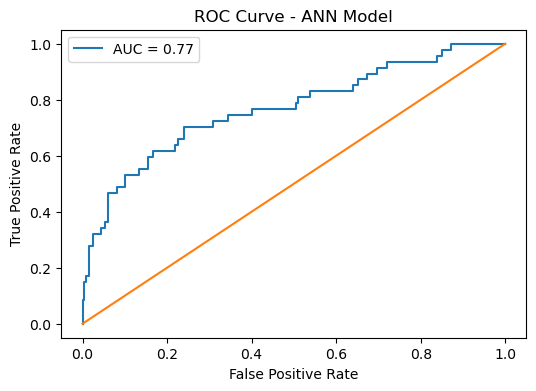

In [68]:
# FULL ANN MODEL ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN Model")
plt.legend()
plt.show()

**Training vs Validation Loss**

*Explanation:*
> This graph helps detect overfitting by comparing training and validation loss during model learning.

---------------------------------------------------------------------------------------------------------------------------------------------

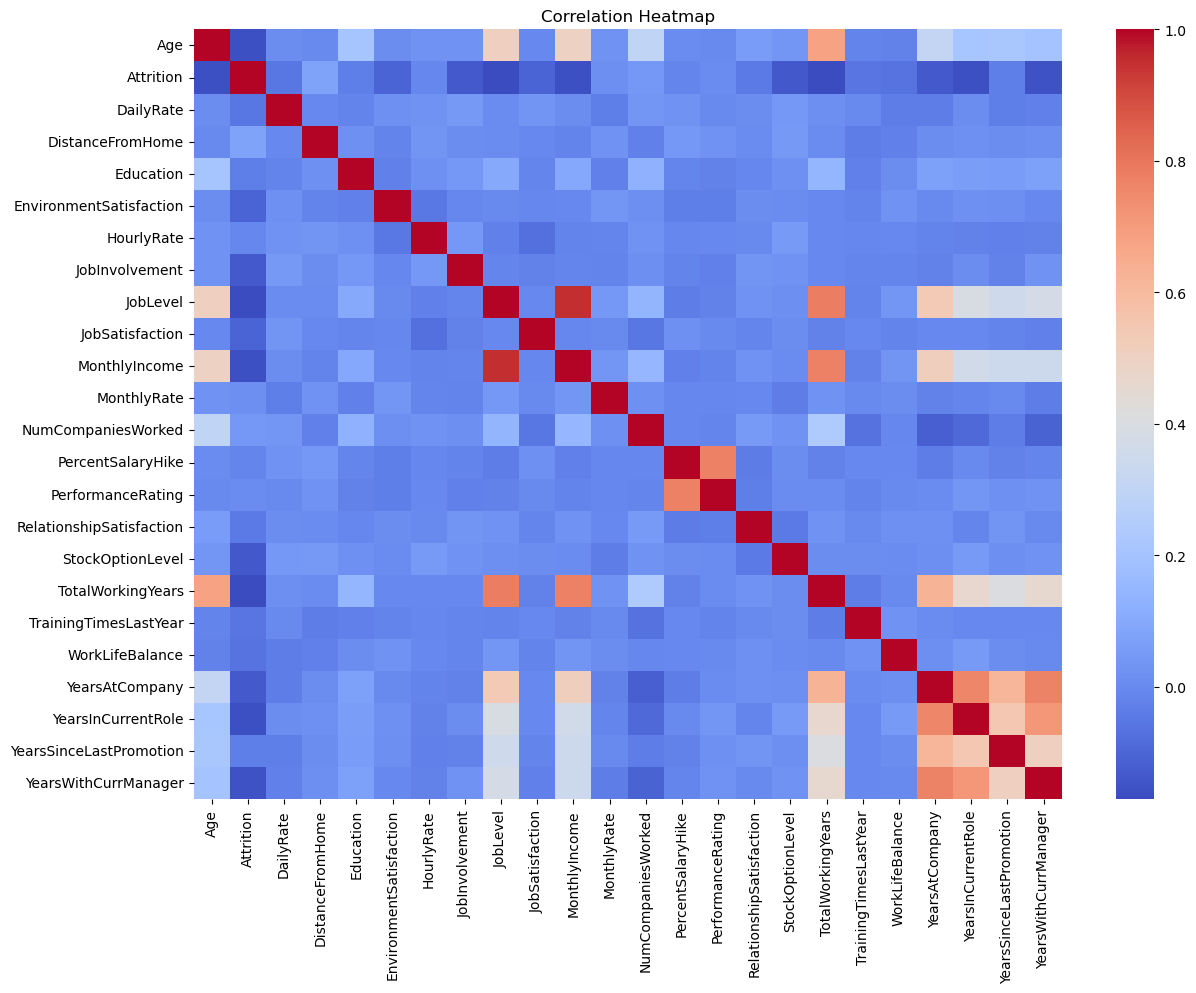

In [69]:
# PURE CORRELAION BETWEEN DATASET.
plt.figure(figsize=(14,10))
corr = data.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap**

*Explanation:*
> This heatmap shows relationships between numerical features, revealing factors that influence attrition patterns.

---------------------------------------------------------------------------------------------------------------------------------------------

In [70]:
# This code preprocesses one sample, makes a prediction using the trained model, 
# and labels the result as “Yes” or “No” based on a 0.5 probability threshold.
sample = X.iloc[[0]]
sample_processed = preprocessor.transform(sample)

prediction = model.predict(sample_processed)

print("Attrition Risk:", "Yes" if prediction > 0.5 else "No")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Attrition Risk: Yes


**Conclusion**

> The ANN model successfully predicts employee attrition using structured HR data

> Proper preprocessing plays a critical role in model performance

> The use of binary cross-entropy and Adam optimizer makes the model reliable for classification

> This system can be used by HR teams to:

> Identify high-risk employees

> Improve retention strategies

> Support data-driven decision making